In [134]:
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
import random

from string import ascii_uppercase as letters
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [52]:
from sklearn.metrics import classification_report, accuracy_score

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('data_letters.txt', sep=" ", header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,784,785,786
0,A,0,person10,238,244,249,247,246,250,250,...,249,252,253,250,248,252,251,252,253,244
1,A,0,person10,251,248,246,250,253,254,244,...,248,253,249,252,251,247,252,252,253,253
2,A,0,person10,245,250,253,249,247,252,243,...,238,244,246,240,248,248,244,249,246,249
3,A,0,person10,253,250,253,251,247,254,254,...,249,250,251,251,246,248,246,249,243,248
4,A,0,person10,245,245,251,248,246,252,254,...,249,250,250,250,253,249,253,249,250,241


In [19]:
df[0].value_counts()

A    656
E    599
I    542
N    494
O    472
T    451
R    315
B    300
L    295
S    294
G    268
V    250
M    250
Q    244
D    229
C    219
U    219
Z    208
J    207
F    206
H    200
Y    190
K    186
P    184
X    183
W    179
Name: 0, dtype: int64

In [98]:
ndf = df.copy()

In [99]:
ans_l = np.array(ndf[0])
y = np.array(ndf[1])
del ndf[0]
del ndf[1]
del ndf[2]
X = np.array(ndf)

In [100]:
Xs = []
ys = []

In [104]:
for person, ltrs in ndf.groupby(2):
    tmp_y = np.array(ltrs[1])
    del ltrs[1]
    del ltrs[2]
    tmp_X = np.array(ltrs)
    Xs.append(tmp_X)
    ys.append(tmp_y)

In [200]:
# запустить, если разделять тренировочную и обучающую выборку наивным способом
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [182]:
#или запустить, если нужно обучаться и тренироваться на разных людях
X_train = np.concatenate(Xs[:14])
X_test = np.concatenate(Xs[14:])
y_train = np.concatenate(ys[:14])
y_test = np.concatenate(ys[14:])

In [201]:
pca = PCA(50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [202]:
from string import ascii_uppercase as letters

d = {i[0]: i[1] for i in enumerate(letters)}

In [203]:
scaler = StandardScaler()

In [204]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
svm = SVC(class_weight="balanced", C=10)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.8358843537414966

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

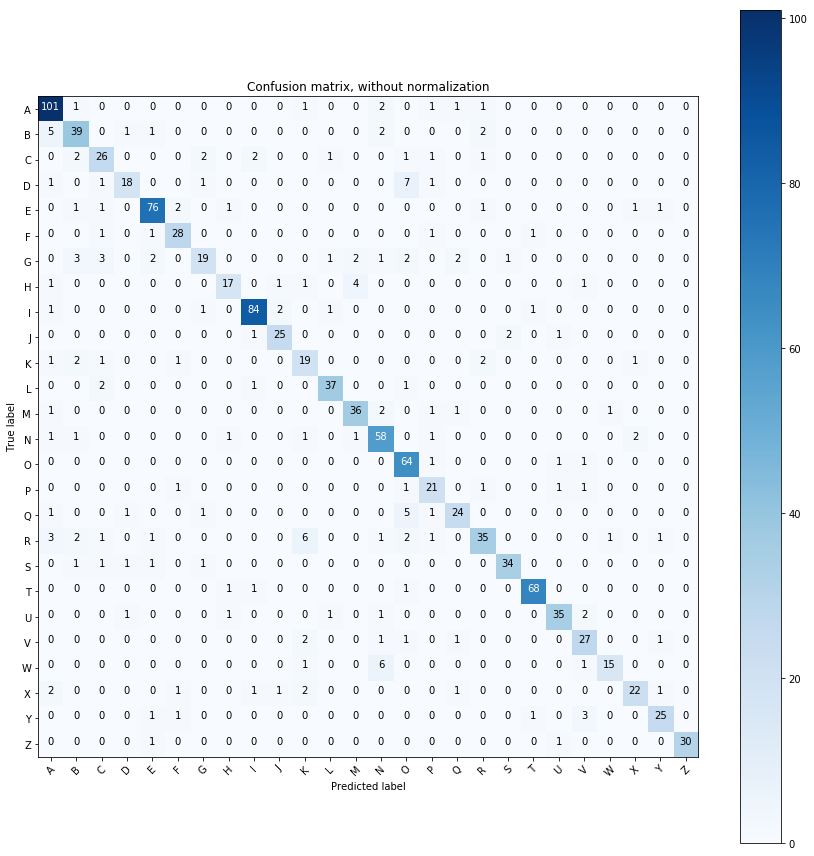

<Figure size 432x288 with 0 Axes>

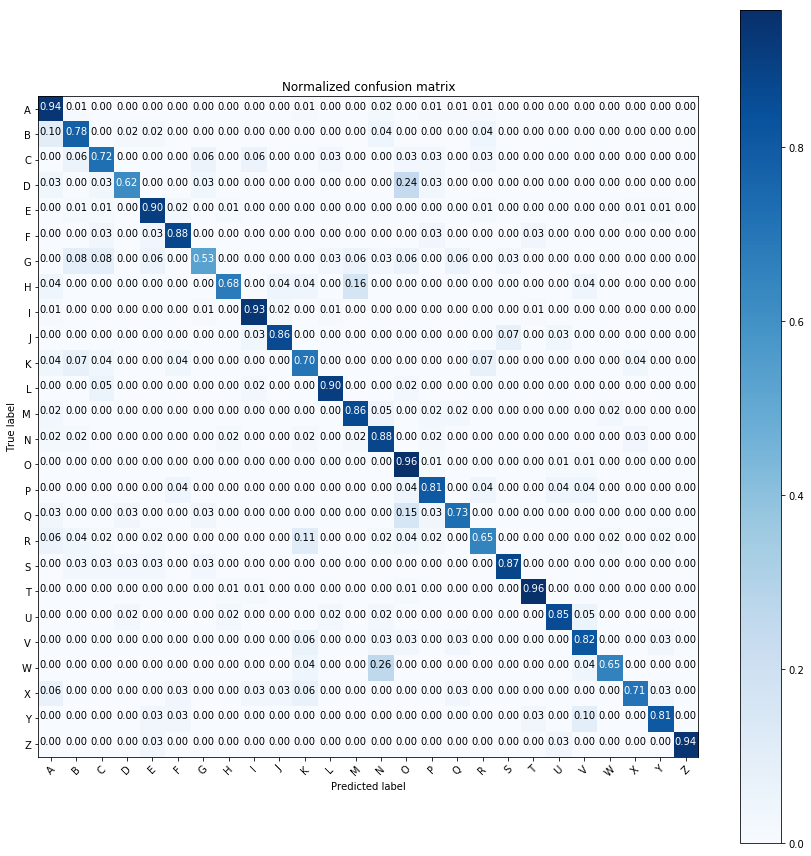

In [194]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, normalize=True, title='Normalized confusion matrix')
plt.show()

Predicted letter is O


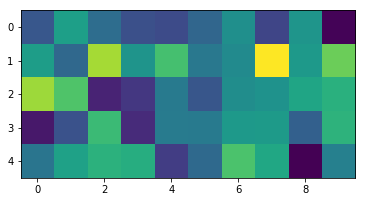

In [214]:
i = random.randint(0, len(X_test)-5)
plt.imshow(X_test[i].reshape(5,10))
print("Predicted letter is {}".format(d[y_pred[i]]))


Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

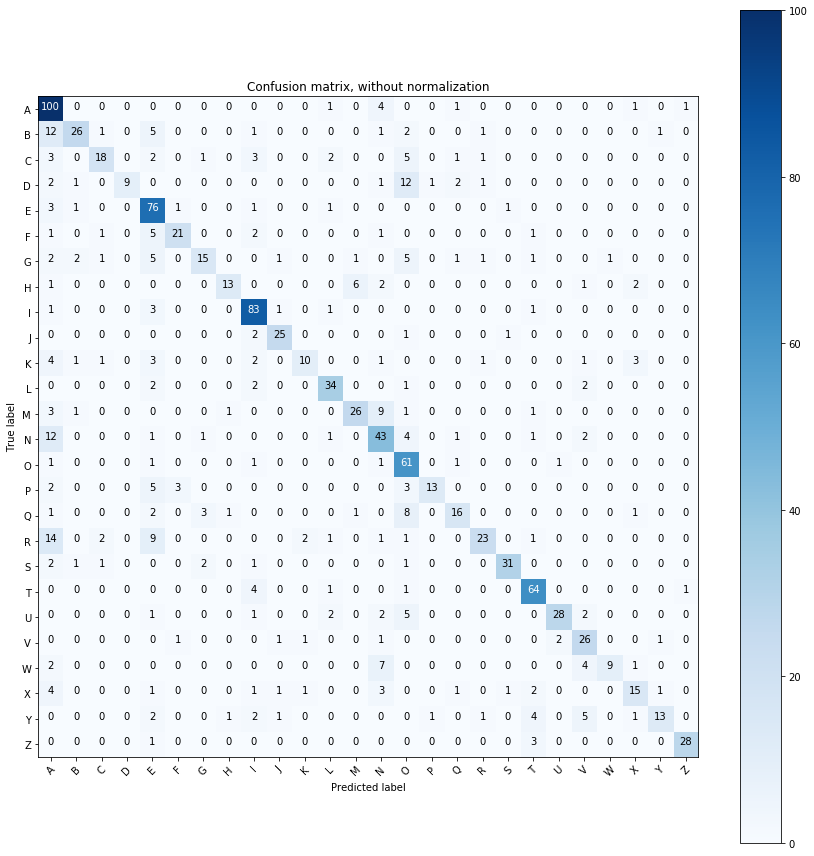

<Figure size 432x288 with 0 Axes>

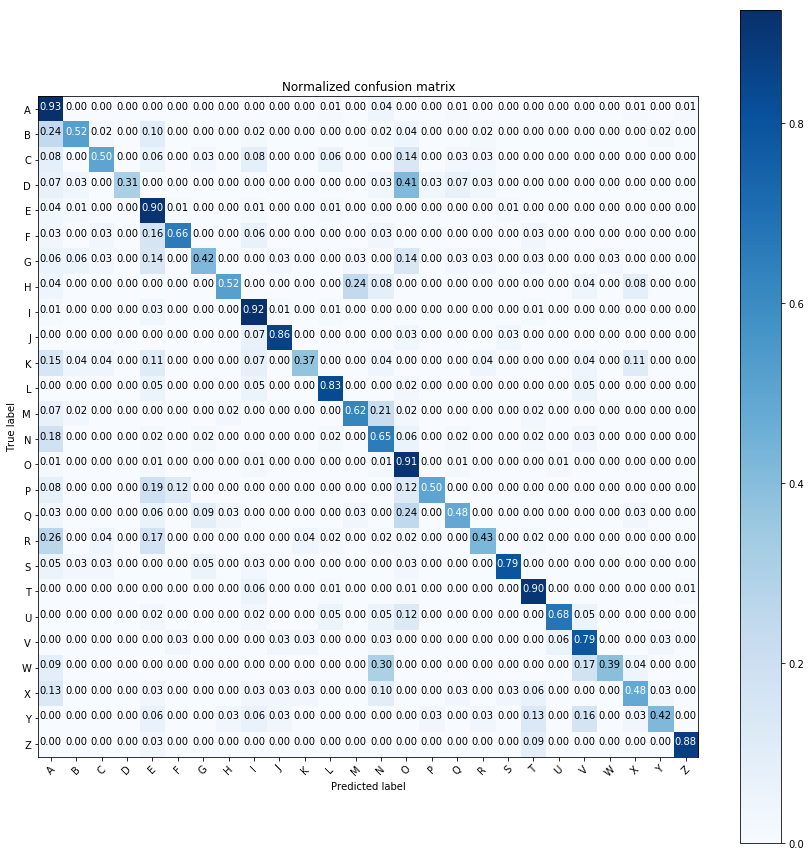

In [218]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, normalize=True, title='Normalized confusion matrix')
plt.show()

In [215]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.6760204081632653

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

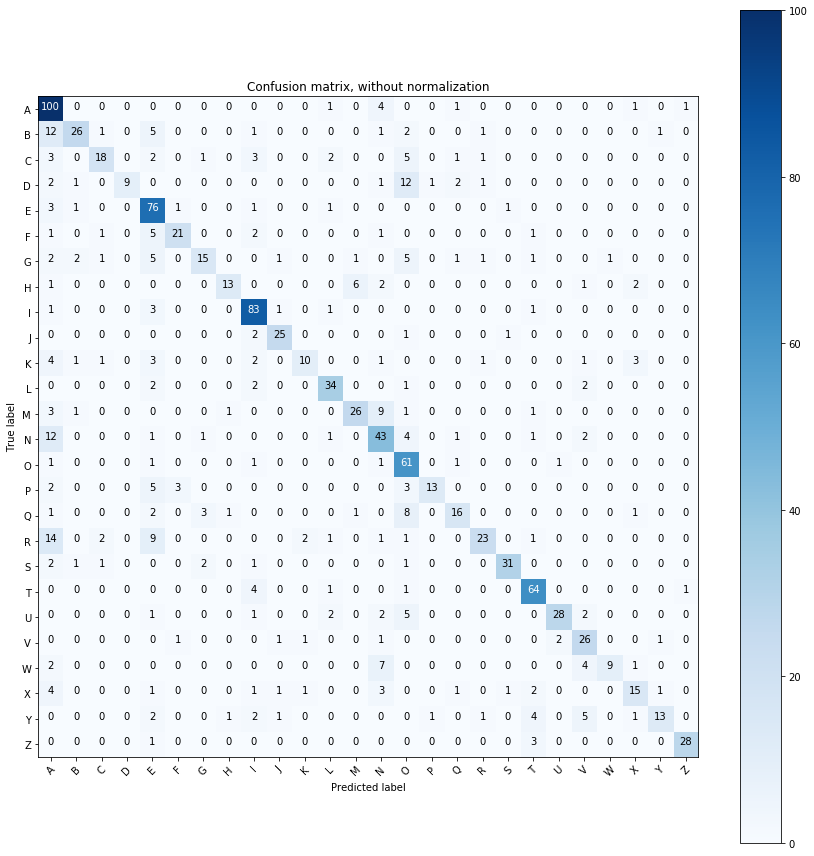

<Figure size 432x288 with 0 Axes>

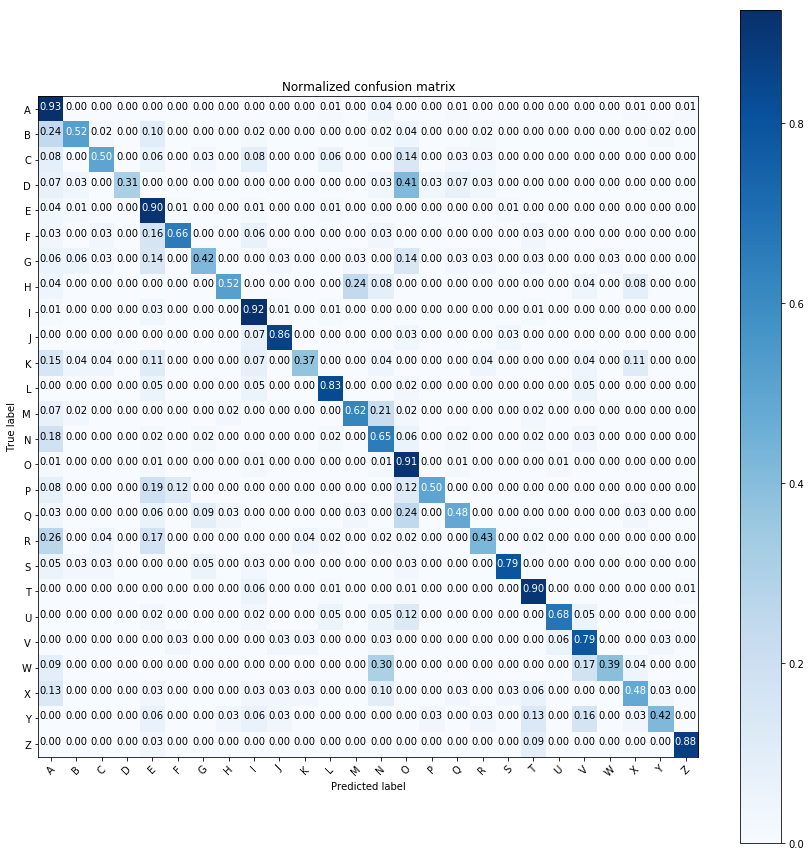

In [219]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, normalize=True, title='Normalized confusion matrix')
plt.show()

In [217]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7023809523809523

Confusion matrix, without normalization
Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

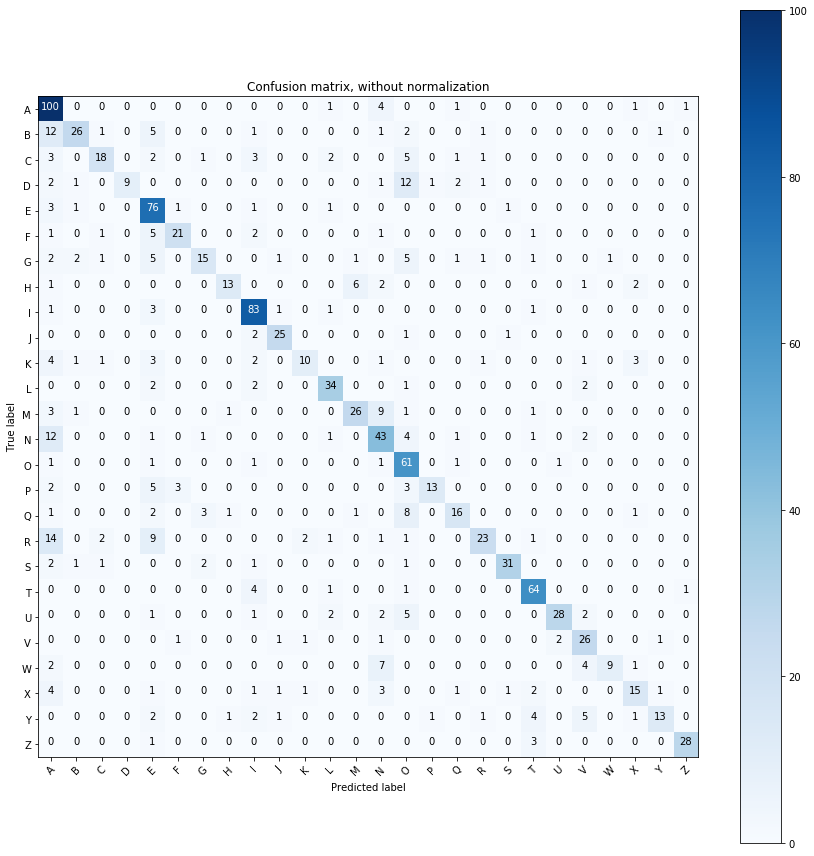

<Figure size 432x288 with 0 Axes>

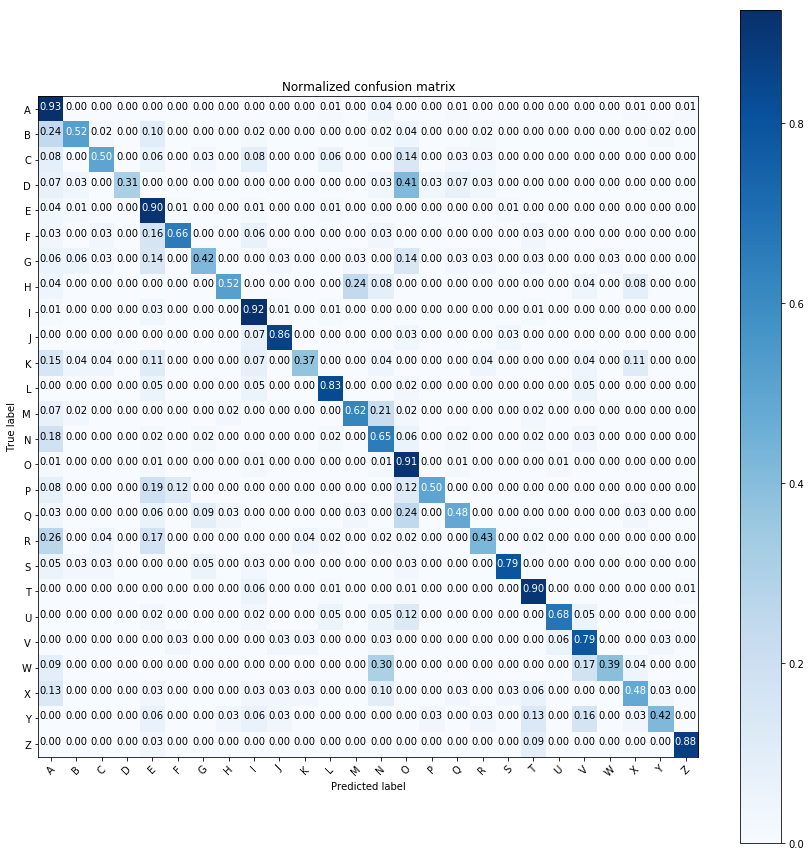

In [220]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=letters, normalize=True, title='Normalized confusion matrix')
plt.show()

In [228]:
svm.support_vectors_

array([[ 0.87,  0.4 , -0.19, ..., -0.27,  0.21,  1.34],
       [ 1.7 , -0.84,  0.02, ...,  0.86, -0.17, -0.89],
       [-1.82,  0.75,  0.37, ...,  0.45, -0.04, -0.02],
       ...,
       [ 0.59,  0.9 , -1.91, ..., -1.88,  0.8 ,  1.67],
       [-0.66, -0.68,  0.58, ..., -2.34,  0.41, -1.15],
       [-0.43,  0.14,  1.21, ..., -1.21, -1.4 ,  0.68]])